# Lab 12a

----

## P1


Given a collection of points $P = \{ p_i : i = 1,2,\cdots, k\} \subset \mathbb R^n$ their **convex hull** will be denoted

$$C(P) = \{ t_1p_1 + t_2p_2 + \cdots + t_kp_k : 0 \leq t_i \leq 1 \ \forall i, t_1+t_2+\cdots+t_k = 1 \}.$$

In this question we ask you to write an algorithm that determines if a point is in the convex hull of a collection of other points.

Notice that a vector $v$ is in the convex hull if and only if you can solve the system of linear equations

$$ v = t_1p_1 + t_2p_2 + \cdots + t_kp_k $$
$$ 1 = t_1 + t_2 + \cdots + t_k$$
together with the inequalities
$0 \leq t_1, t_2, \cdots, t_k \leq 1$.

From the perspective of linear algebra, this is a system of $n+1$ linear equations in $k$ variables, with some constraints. The simplest non-trivial version of this problem is when $k=n+1$.   If your points $P$ in $\mathbb R^n$ do not sit on an affine $n-1$-dimensional subspace of $\mathbb R^n$ we say they are in **general position**.   The convex hull of $n+1$-points that are in general position in $\mathbb R^n$ is called an $n$-simplex.  A $1$-simplex is typically called an *interval*, a $2$-simplex a *triangle*, a $3$-simplex a *tetrahedron*, etc. 

Write a Python function **in_hull(P, v)** that takes as input the points **P** as an $n\times (n+1)$-numpy array (or numpy matrix), with $v$ an $n \times 1$-numpy matrix.  Have your function return the coefficient vector $T$ as an $(n+1) \times 1$-numpy matrix, if there is a solution.  The function should return **None** otherwise.


In [2]:
import numpy as np
import pprint as pp

In [77]:
def in_hull(P, v):
    '''
    Input:
        P: n x (n+1) numpy array/matrix.
        v: n x 1 numpy matrix
    Output:
        Determines if a point v is in the convex hull of the collection of points - P
        Returns:
            T: Coefficient vector. A (n+1) x 1 numpy matrix. (If a solution exist for t = [0,1])
            None: Otherwise
    '''
    A = np.array([1 for i in range(np.shape(P)[1])])
    #print(A)
    
    v2 = np.concatenate((v, [[1]]), axis = 0)
    P2 = np.concatenate((P, [A]), axis = 0)
    #print(P2)
    #print(v2)
    
    if np.linalg.det(P2) == 0:
        return None
    else:
        T = np.linalg.solve(P2, v2) # Could also use T = P**-1 * V
        if np.any(T >1) or np.any(T < 0):
            return None
        else:
            #print("True")
            return np.asmatrix(T)

In [19]:
Pm = np.matrix([[1,2], [3,4], [5,6]]).T
vm = np.array([[2, 7]]).T
in_hull(Pm, vm)

[1 1 1]
[[1 3 5]
 [2 4 6]
 [1 1 1]]
[[2]
 [7]
 [1]]


In [16]:
## Test case when P 'matrix' is a numpy matrix
Pm2 = np.matrix([[0,1],[1,0], [1,1]]).T
vm2 = np.matrix([[0.5, 0.5]]).T
in_hull(Pm2, vm2)

[1 1 1]
[[0 1 1]
 [1 0 1]
 [1 1 1]]
[[0.5]
 [0.5]
 [1. ]]
True


matrix([[ 0.5],
        [ 0.5],
        [-0. ]])

In [21]:
## Test case when P 'matrix' is a numpy array
Pm3 = np.array([[1,0,0],[0,0,1],[1, 1, 1], [0, 1, 0]]).transpose()
vm3 = np.matrix([[0.5, 0.5, 0.5]]).T
in_hull(Pm3, vm3)

[1 1 1 1]
[[1 0 1 0]
 [0 0 1 1]
 [0 1 1 0]
 [1 1 1 1]]
[[0.5]
 [0.5]
 [0.5]
 [1. ]]
True


matrix([[0.25],
        [0.25],
        [0.25],
        [0.25]])

----

## P2

Create a function that takes as input a single integer $n$.  The function will choose $3$ points at random in the unit square, and also an additional $n$ points at random in the unit square $[0,1]^2$.  

The algorithm will then plot the perimiter of the triangle formed by the first three points, as a line plot in black.  It will also plot the remaining $n$ points, using a point plot.  The points in the convex hull of the first three will be coloured red, the points outside the convex hull will be coloured yellow.

Include one plot for $n=1000$. 

A sample output of what we expect is below.

![alt text](12a.demo.png)

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import random as rd


In [84]:
def P2_func(n):
    '''
    Input: 
        n: Integer
        In a unit square, generate 3 randomized points and form a convex hull out of those three points.
        Randomly generates additional n points in that unit square.
    Output:
        A scatterplot with n randomized points, with points within the convex hull highlighted in red.
    '''
    x = []
    y = []
    x_init = []
    y_init = []
    
    ## The first 3 initial points.
    for i in range(3):
        x_init.append(np.around(rd.random(), 3) )
        y_init.append(np.around(rd.random(), 3) )
    #print(x_init, y_init)
    
    ## The additional n points:
    for i in range(n):
        x.append(np.around(rd.random(), 3) )
        y.append(np.around(rd.random(), 3) )
    #print(x,y)
    
    ## The first 3 points forms the P-matrix in Part 1
    P = np.matrix([ [i for i in x_init], [i for i in y_init] ])
    #print(P)
    
    ## Plot the triangle
    #plt.plot([i for i in x_init], [i for i in y_init], '-r')
    plt.fill([i for i in x_init], [i for i in y_init], fill= False)
    
    ## Determine if a point is within convex hull
    for i in range(n):
        v = np.matrix([ [x[i]], [y[i]] ])
        test = in_hull(P, v)
        if np.any(test) == None:
            plt.plot(x[i], y[i], 'yo', alpha = 0.5)
        else:
            plt.plot(x[i], y[i], 'ro', alpha = 0.5)

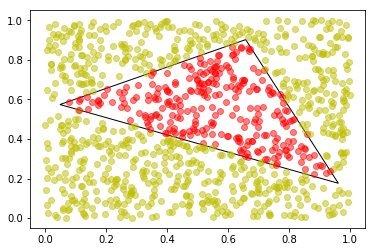

In [85]:
P2_func(1000)